# Regression Discontinuity Design

## Prepare Notebook

In [2]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

from scipy.special import expit

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [56]:
seed: int = 12282020
rng: np.random.Generator = np.random.default_rng(seed=seed)


## Data Generation

[Text(0.5, 1.0, 'Treatment Effect'), Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

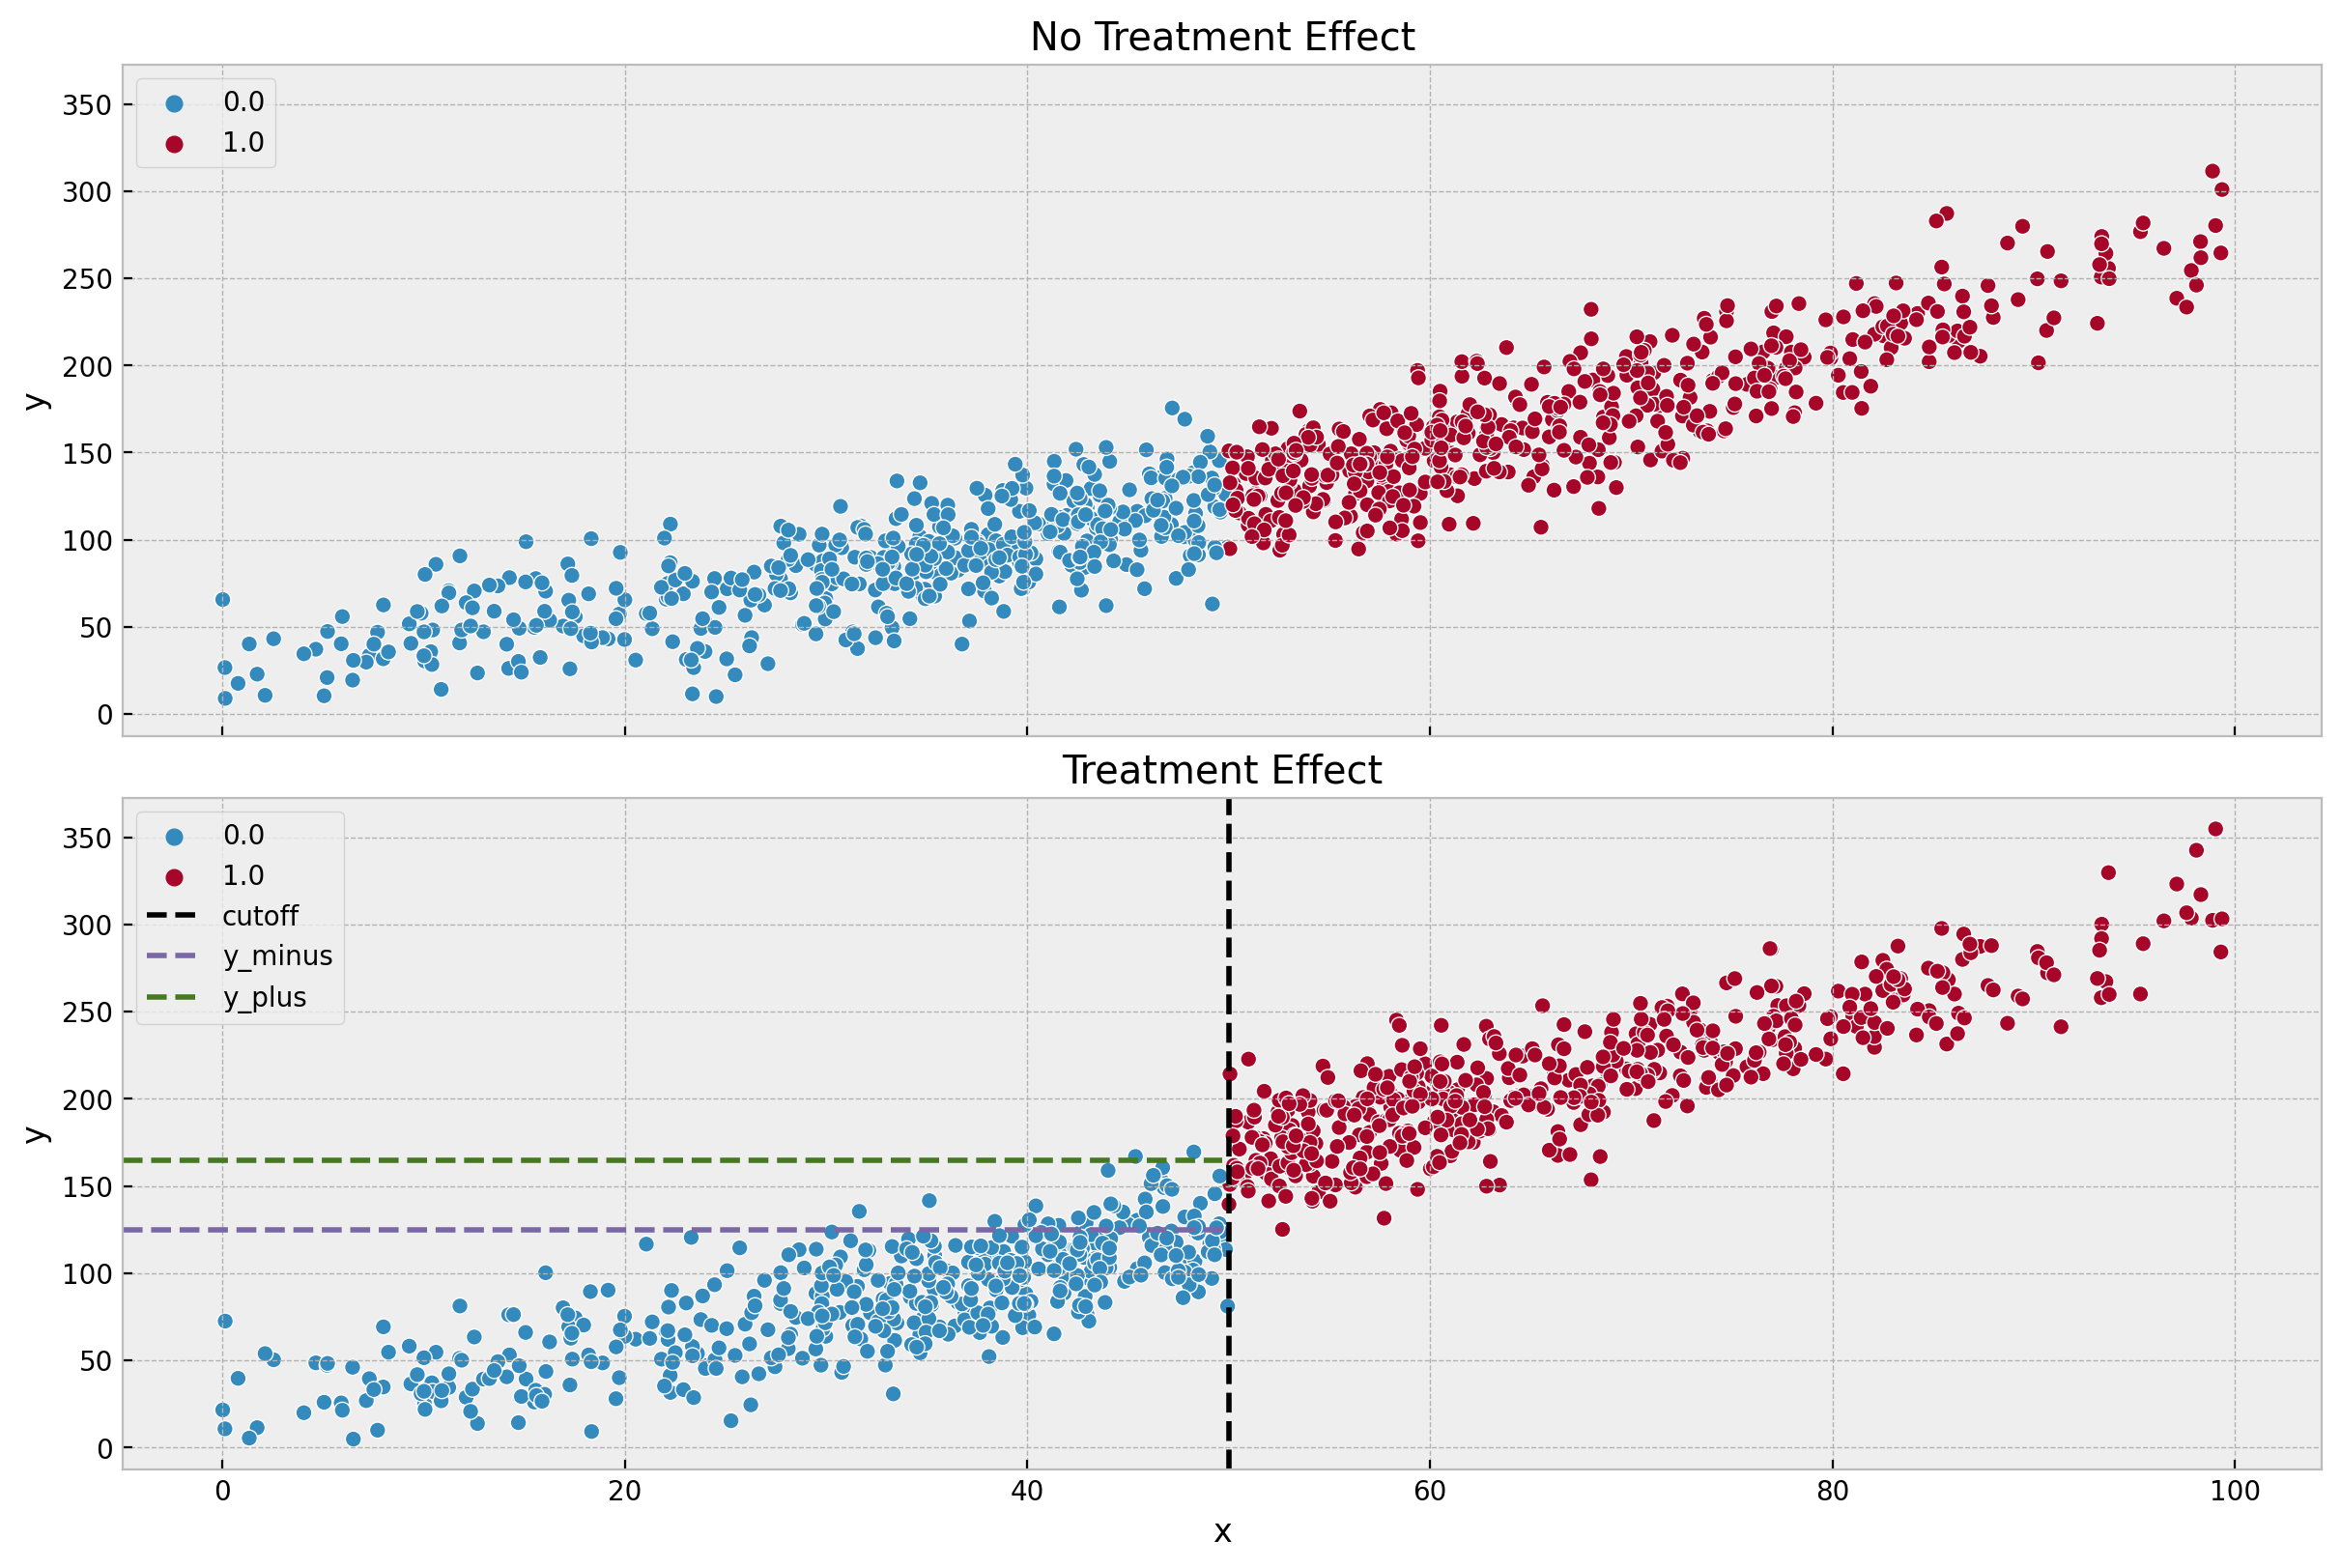

In [91]:
n = 1_000
c = 50
delta = 40

x = rng.normal(loc=c, scale=25, size=n)

d = (x > c).astype(float)

intercept = 25
slope = 1.5
quadratic = 0.01

y0 = (
    intercept
    + slope * x
    + quadratic * x**2
    + 0 * d
    + rng.normal(loc=0, scale=20, size=n)
)
y = (
    intercept
    + slope * x
    + quadratic * x**2
    + delta * d
    + rng.normal(loc=0, scale=20, size=n)
)

data = pd.DataFrame(data={"x": x, "d": d, "y0": y0, "y": y})
mask = "0 < x < 100 and 0 < y0 and 0 < y"
data.query(expr=mask, inplace=True)

y_minus = intercept + slope * c + quadratic * c**2
y_plus = y_minus + delta

fig, ax = plt.subplots(
    nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 8), layout="constrained"
)
sns.scatterplot(data=data, x="x", y="y0", hue="d", ax=ax[0])
ax[0].legend(loc="upper left")
ax[0].set(title="No Treatment Effect", xlabel="x", ylabel="y")
sns.scatterplot(data=data, x="x", y="y", hue="d", ax=ax[1])
ax[1].axvline(x=c, color="black", linestyle="--", label="cutoff")
ax[1].axhline(
    y=y_minus,
    xmax=0.5,
    color="C2",
    linestyle="--",
    label="y_minus",
)
ax[1].axhline(
    y=y_plus,
    xmax=0.5,
    color="C3",
    linestyle="--",
    label="y_plus",
)
ax[1].legend(loc="upper left")
ax[1].set(title="Treatment Effect", xlabel="x", ylabel="y")


In [54]:
# https://discourse.pymc.io/t/weights-for-model-in-bambi/11484/10

100.0